In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt
import sys
import warnings

In [2]:
df1=pd.read_csv('365_course_ratings.csv')
df2=pd.read_csv('365_student_quizzes.csv')
df3=pd.read_csv('365_quiz_info.csv')
df4=pd.read_csv('365_exam_info.csv')
df5=pd.read_csv('365_course_info.csv')
df6=pd.read_csv('365_student_purchases.csv')
df7=pd.read_csv('365_student_learning.csv')
df8=pd.read_csv('365_student_info.csv')
df9=pd.read_csv('365_student_hub_questions.csv')
df10=pd.read_csv('365_student_engagement.csv')
df11=pd.read_csv('365_student_exams.csv')

In [3]:
df1.sample(1)

,course_id,student_id,course_rating,date_rated
1294,7,282207,4,2022-07-22


In [4]:
df2.sample(1)

,student_id,quiz_id,question_id,answer_id
130111,290206,22,22,86.0


In [5]:
df3.sample(1)

,quiz_id,question_id,answer_id,answer_correct
3521,355,896,3538,n


In [6]:
df4.sample(1)

,exam_id,exam_category,exam_duration
37,541,2,10


In [7]:
df5.sample(1)

,course_id,course_title
40,52,Machine Learning with Support Vector Machines


In [8]:
df6.sample(1)

,purchase_id,student_id,purchase_type,date_purchased
977,18596,271035,Annual,2022-04-17


In [9]:
df7.sample(1)

,student_id,course_id,minutes_watched,date_watched
43205,278833,7,10.8,2022-06-21


In [10]:
df8.sample(1)

,student_id,student_country,date_registered
12969,272182,BR,2022-04-27


In [11]:
df9.sample(1)

,hub_question_id,student_id,date_question_asked
747,10181,263496,2022-10-04


In [12]:
df10.sample(1)

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
12431,378948,259028,0,0,1,2022-01-25


In [13]:
df11.sample(1)

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
22826,221183,285625,702,67,1.75,2022-08-16


# Feature engineering & Pre-Processing

In [14]:
df1['counter']=1
engfr=[]
for x in df8['student_id']:
    engfr.append(df1.loc[df1['student_id'] == x, 'counter'].sum())
df8["courses_rated"] = engfr

In [15]:
df8.sample(10)

,student_id,student_country,date_registered,courses_rated
26084,285730,PK,2022-08-15,0
34528,294791,PK,2022-10-15,0
31937,291846,PL,2022-09-23,0
8485,267484,ID,2022-03-16,0
2386,261250,AE,2022-01-22,0
11527,270677,SA,2022-04-13,0
4560,263479,US,2022-02-13,0
11071,270199,RO,2022-04-09,0
14238,273498,BR,2022-05-11,0
24022,283632,MX,2022-08-02,0


In [16]:
df7=df7.drop_duplicates(
  subset = ['student_id', 'course_id'],
  keep = 'last').reset_index(drop = True)

In [17]:
df7['counter']=1
courses_watched_by_student=[]
for x in df8['student_id']:
    courses_watched_by_student.append(df7.loc[df7['student_id'] == x, 'counter'].sum())
df8["courses_watched"] = courses_watched_by_student

In [18]:
df8.sample(10)

,student_id,student_country,date_registered,courses_rated,courses_watched
25620,285260,IT,2022-08-13,0,0
4899,263831,AE,2022-02-16,0,0
30611,290375,GB,2022-09-12,0,1
1694,260539,SA,2022-01-15,0,0
30244,289995,PK,2022-09-09,0,0
14871,274142,MY,2022-05-16,0,0
14851,274118,AZ,2022-05-16,0,1
20382,279867,US,2022-06-30,0,0
10469,269573,NG,2022-04-04,0,1
12381,271570,PK,2022-04-22,0,0


In [19]:
df10['counter']=1
engfr=[]
for x in df8['student_id']:
    engfr.append(df10.loc[df10['student_id'] == x, 'counter'].sum())
df8["number_of_engagments"] = engfr

cor=[]
for x in df8['student_id']:
    cor.append(df10.loc[df10['student_id'] == x, 'engagement_lessons'].sum())
df8["engagments_lessons"] = cor

ex=[]
for x in df8['student_id']:
    ex.append(df10.loc[df10['student_id'] == x, 'engagement_exams'].sum())
df8["engagement_exams"] = ex

qu=[]
for x in df8['student_id']:
    qu.append(df10.loc[df10['student_id'] == x, 'engagement_quizzes'].sum())
df8["engagement_quizzes"] = qu

In [20]:
df8

,student_id,student_country,date_registered,courses_rated,courses_watched,number_of_engagments,engagments_lessons,engagement_exams,engagement_quizzes
0,258798,IN,2022-01-01,0,1,1,1,0,0
1,258799,CO,2022-01-01,0,0,0,0,0,0
2,258800,CA,2022-01-01,0,9,29,29,5,10
3,258801,IN,2022-01-01,0,0,0,0,0,0
4,258802,US,2022-01-01,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
35225,295511,CM,2022-10-20,0,1,1,1,0,1
35226,295512,CA,2022-10-20,0,1,1,1,0,1
35227,295513,SA,2022-10-20,0,1,1,1,0,0
35228,295514,NL,2022-10-20,0,0,0,0,0,0


In [21]:
paid_students_id=[]
for x in df6['student_id']:
    paid_students_id.append(x)
    
def paid_free(x):
    if x in paid_students_id:
        return 1
    else:
        return 0
    
df8['Paid']=df8['student_id'].map(paid_free)

In [22]:
average_course_rating=[]
for x in df8['student_id']:
    average_course_rating.append(df1.loc[df1['student_id'] == x, 'course_rating'].mean())
df8['average_course_rating'] = average_course_rating

minutes_watched_by_student=[]
for x in df8['student_id']:
    minutes_watched_by_student.append(df7.loc[df7['student_id'] == x, 'minutes_watched'].sum())
df8['minutes_watched_by_student']=minutes_watched_by_student

In [23]:
df8

,student_id,student_country,date_registered,courses_rated,courses_watched,number_of_engagments,engagments_lessons,engagement_exams,engagement_quizzes,Paid,average_course_rating,minutes_watched_by_student
0,258798,IN,2022-01-01,0,1,1,1,0,0,0,NaN,0.3
1,258799,CO,2022-01-01,0,0,0,0,0,0,0,NaN,0.0
2,258800,CA,2022-01-01,0,9,29,29,5,10,1,NaN,74.3
3,258801,IN,2022-01-01,0,0,0,0,0,0,0,NaN,0.0
4,258802,US,2022-01-01,0,0,0,0,0,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35225,295511,CM,2022-10-20,0,1,1,1,0,1,0,NaN,7.8
35226,295512,CA,2022-10-20,0,1,1,1,0,1,0,NaN,10.4
35227,295513,SA,2022-10-20,0,1,1,1,0,0,0,NaN,0.1
35228,295514,NL,2022-10-20,0,0,0,0,0,0,0,NaN,0.0


# Finding Correlation

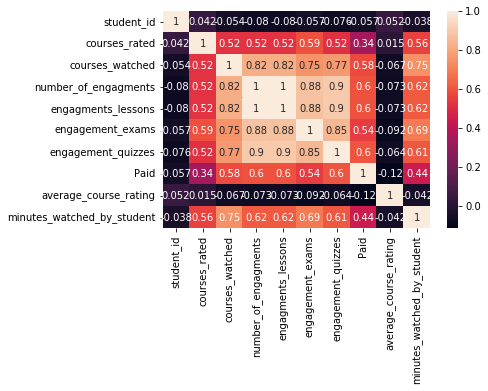

In [24]:
corr_matrix = df8.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [25]:
df8=df8.drop(['student_country','date_registered','average_course_rating'], axis=1)

# Splitting the dataset & Buliding the model

In [31]:
x=df8.drop(['student_id','Paid'],axis=1)
y=df8['Paid']
x

,courses_rated,courses_watched,number_of_engagments,engagments_lessons,engagement_exams,engagement_quizzes,minutes_watched_by_student
0,0,1,1,1,0,0,0.3
1,0,0,0,0,0,0,0.0
2,0,9,29,29,5,10,74.3
3,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...
35225,0,1,1,1,0,1,7.8
35226,0,1,1,1,0,1,10.4
35227,0,1,1,1,0,0,0.1
35228,0,0,0,0,0,0,0.0


In [27]:
x.isnull().sum()

courses_rated                 0
courses_watched               0
number_of_engagments          0
engagments_lessons            0
engagement_exams              0
engagement_quizzes            0
minutes_watched_by_student    0
dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [29]:
y_train.value_counts()

0    24870
1     1552
Name: Paid, dtype: int64

## Trying two methods to fix imbalanced classes , Starting by oversampling SMOTE , it works the following way :

### Identify the minority class vector.
### Deciding the number of nearest k-nearest neighbour 
### generating line between the minority data points and any of its neighbors and place a synthetic point



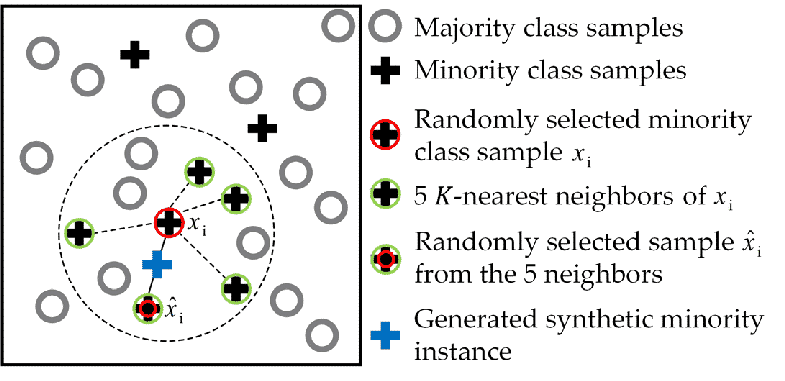

In [30]:
sampler=SMOTE()
x_train_over_sampled,y_train_over_sampled=sampler.fit_resample(x_train,y_train)
y_train_over_sampled.value_counts()

1    24833
0    24833
Name: Paid, dtype: int64

## Scaling data

In [31]:
scaler1=StandardScaler()
scaler1.fit(x_train_over_sampled)
x_train_over_sampled=scaler1.transform(x_train_over_sampled)
x_test=scaler1.transform(x_test)
x_train_over_sampled

array([[ 0.7120994 ,  0.65284418, -0.04562089, ...,  0.68694528,
         0.13004891,  0.38561916],
       [-0.27190619, -0.39316392, -0.49172123, ..., -0.46003941,
        -0.56197543, -0.43251204],
       [-0.27190619, -0.74183328, -0.55544984, ..., -0.46003941,
        -0.56197543, -0.43301925],
       ...,
       [ 4.64812172,  4.48820721,  5.62622618, ...,  7.3776893 ,
         5.66624365,  4.52799969],
       [-0.27190619, -0.39316392, -0.49172123, ..., -0.46003941,
        -0.56197543, -0.21094837],
       [-0.27190619,  0.30417481, -0.30053537, ..., -0.2688753 ,
        -0.04295717,  0.44889448]])

In [38]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [37]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train_over_sampled,y_train_over_sampled)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train_over_sampled,model.predict(x_train_over_sampled))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.881971570088189
Testing Accuracy :0.942211625794732
Confusion matrix:
 [[7875  387]
 [ 122  424]]
Recall: 0.7765567765567766
precision: 0.5228113440197287
F1-score: 0.6249078850405305
Fbeta-score: 0.5593667546174143
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      8262
           1       0.52      0.78      0.62       546

    accuracy                           0.94      8808
   macro avg       0.75      0.86      0.80      8808
weighted avg       0.96      0.94      0.95      8808

---------------------------------
using KNN: 
Training Accuracy :0.9309789393146217
Testing Accuracy :0.9266575840145322
Confusion matrix:
 [[7741  521]
 [ 125  421]]
Recall: 0.7710622710622711
precision: 0.4469214437367304
F1-score: 0.5658602150537634
Fbeta-score: 0.48794622160407986
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8262
           1       0.45      0

C:\Users\101\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Training Accuracy :0.9322474127169492
Testing Accuracy :0.9391462306993642
Confusion matrix:
 [[7861  401]
 [ 135  411]]
Recall: 0.7527472527472527
precision: 0.5061576354679803
F1-score: 0.605301914580265
Fbeta-score: 0.5416447021613073
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      8262
           1       0.51      0.75      0.61       546

    accuracy                           0.94      8808
   macro avg       0.74      0.85      0.79      8808
weighted avg       0.95      0.94      0.94      8808

---------------------------------
using RF: 
Training Accuracy :0.9673015745177788
Testing Accuracy :0.9436875567665758
Confusion matrix:
 [[7910  352]
 [ 144  402]]
Recall: 0.7362637362637363
precision: 0.53315649867374
F1-score: 0.6184615384615385
Fbeta-score: 0.5642897248736665
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8262
           1       0.53      0.74      0.62

## Cross-Validation

In [38]:
model=DecisionTreeClassifier(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([0.06105161, 0.05004048, 0.06005144, 0.05704641, 0.05304241,
        0.05404377, 0.05104327, 0.04103827, 0.05704808, 0.0550468 ]),
 'score_time': array([0.00300646, 0.00300193, 0.00300455, 0.00300503, 0.00300288,
        0.00300264, 0.00200152, 0.00300407, 0.00300431, 0.00300431]),
 'test_score': array([0.96792506, 0.96423503, 0.96423503, 0.96253193, 0.95912575,
        0.9577065 , 0.95628726, 0.94578484, 0.9577065 , 0.95202952]),
 'train_score': array([0.99189453, 0.99230454, 0.99224146, 0.99230454, 0.99271454,
        0.99255685, 0.99233608, 0.99252531, 0.99239915, 0.99255685])}

In [39]:
CV_result['test_score'].mean()

0.958756741413568

In [40]:
model=SVC(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([7.74404979, 7.74805427, 7.75205922, 7.76707244, 7.75305963,
        7.56788898, 7.78208637, 7.80610967, 7.87316465, 7.46379828]),
 'score_time': array([1.250139  , 1.10400486, 1.10500503, 1.14404154, 1.081985  ,
        1.16005707, 1.12802768, 1.06396794, 1.085989  , 1.10000205]),
 'test_score': array([0.97331819, 0.97672438, 0.97133125, 0.97246665, 0.96622197,
        0.96338348, 0.96423503, 0.95401646, 0.96565427, 0.95515186]),
 'train_score': array([0.96751506, 0.96685275, 0.96732583, 0.96745198, 0.96836661,
        0.96808276, 0.96798814, 0.9679566 , 0.96760968, 0.96896584])}

In [41]:
CV_result['test_score'].mean()

0.9662503548112404

In [42]:
model=RandomForestClassifier(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([1.54540992, 1.56242228, 1.51437712, 1.59845352, 1.56042051,
        1.58043742, 1.5424037 , 1.53739953, 1.61546898, 1.49836349]),
 'score_time': array([0.05404472, 0.0570507 , 0.05705285, 0.05605173, 0.04604006,
        0.04904461, 0.04904485, 0.0570507 , 0.04904604, 0.05505204]),
 'test_score': array([0.97019586, 0.96849276, 0.9710474 , 0.96877661, 0.96508657,
        0.96338348, 0.96054499, 0.95628726, 0.97019586, 0.96139654]),
 'train_score': array([0.991863  , 0.99224146, 0.99220992, 0.992273  , 0.992683  ,
        0.99255685, 0.99233608, 0.99249377, 0.99239915, 0.99255685])}

In [43]:
CV_result['test_score'].mean()

0.9655407323304003

In [44]:
model1=GaussianNB()
model1.fit(x_train_over_sampled,y_train_over_sampled)
y_pred=model1.predict(x_test)

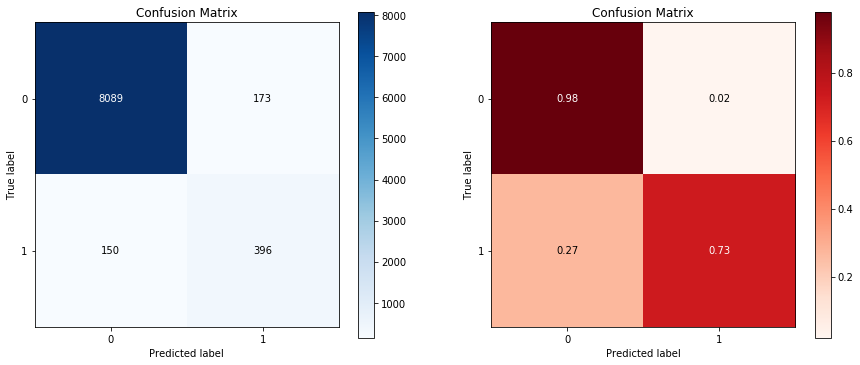

In [45]:
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Reds",
                                    ax=ax2);

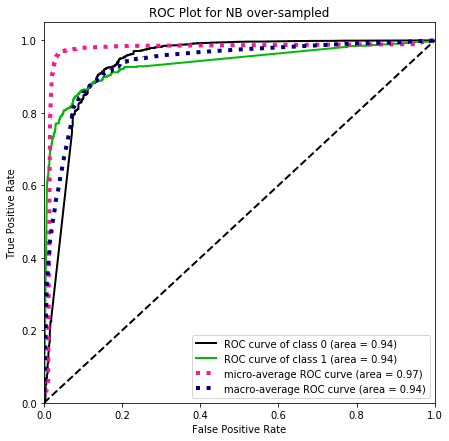

In [46]:
y_gbc_proba = model1.predict_proba(x_test)
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_roc(y_test, y_gbc_proba, title = 'ROC Plot for NB over-sampled',ax=ax)

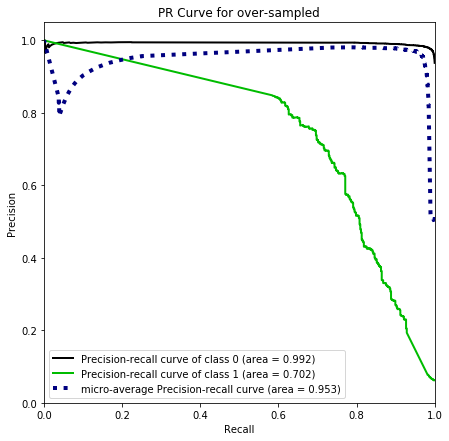

In [47]:
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_precision_recall(y_test, y_gbc_proba, title = 'PR Curve for over-sampled',ax=ax)

# Trying Under-sampling to fix imbalanced classes

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [33]:
rus=RandomUnderSampler()
x_train_under_sampled, y_train_under_sampled=rus.fit_resample(x_train,y_train)

In [34]:
y_train_under_sampled.value_counts()

1    1622
0    1622
Name: Paid, dtype: int64

In [36]:
scaler2=StandardScaler()
scaler2.fit(x_train_under_sampled)
x_train_under_sampled=scaler2.transform(x_train_under_sampled)
x_test=scaler2.transform(x_test)
x_train_under_sampled

array([[-0.30092059, -0.74531364, -0.54770461, ..., -0.46909979,
        -0.56389827, -0.4258858 ],
       [-0.30092059, -0.74531364, -0.54770461, ..., -0.46909979,
        -0.56389827, -0.4258858 ],
       [-0.30092059, -0.74531364, -0.54770461, ..., -0.46909979,
        -0.56389827, -0.4258858 ],
       ...,
       [-0.30092059,  0.52487152,  0.50311082, ...,  0.23894242,
         1.03666696,  0.01233921],
       [-0.30092059, -0.11022106,  0.32797491, ..., -0.46909979,
         0.23638434, -0.41439138],
       [-0.30092059, -0.11022106, -0.08067553, ..., -0.11507869,
         0.39644086, -0.37272408]])

In [39]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train_under_sampled,y_train_under_sampled)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train_under_sampled,model.predict(x_train_under_sampled))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.8853267570900123
Testing Accuracy :0.9425522252497729
Confusion matrix:
 [[7893  402]
 [ 104  409]]
Recall: 0.797270955165692
precision: 0.5043156596794082
F1-score: 0.6178247734138973
Fbeta-score: 0.5443172744210807
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8295
           1       0.50      0.80      0.62       513

    accuracy                           0.94      8808
   macro avg       0.75      0.87      0.79      8808
weighted avg       0.96      0.94      0.95      8808

---------------------------------
using KNN: 
Training Accuracy :0.906596794081381
Testing Accuracy :0.9133742052679382
Confusion matrix:
 [[7616  679]
 [  84  429]]
Recall: 0.8362573099415205
precision: 0.3871841155234657
F1-score: 0.5293028994447871
Fbeta-score: 0.4337714863498483
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      8295
           1       0.39      0.

C:\Users\101\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Testing Accuracy :0.9005449591280654
Confusion matrix:
 [[7506  789]
 [  87  426]]
Recall: 0.8304093567251462
precision: 0.3506172839506173
F1-score: 0.4930555555555556
Fbeta-score: 0.3964265773311
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8295
           1       0.35      0.83      0.49       513

    accuracy                           0.90      8808
   macro avg       0.67      0.87      0.72      8808
weighted avg       0.95      0.90      0.92      8808

---------------------------------
using RF: 
Training Accuracy :0.9620838471023427
Testing Accuracy :0.8919164396003633
Confusion matrix:
 [[7427  868]
 [  84  429]]
Recall: 0.8362573099415205
precision: 0.330763299922899
F1-score: 0.4740331491712707
Fbeta-score: 0.37624978074022103
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8295
           1       0.33      0.84      0.47       513

    accuracy              

In [40]:
model=DecisionTreeClassifier(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([0.05404711, 0.05402994, 0.04702139, 0.05404902, 0.06405663,
        0.04203701, 0.05004168, 0.06906223, 0.05304933, 0.05205274]),
 'score_time': array([0.00300288, 0.00300431, 0.00300407, 0.00300193, 0.00300384,
        0.00400376, 0.00400448, 0.01501799, 0.00500393, 0.00399947]),
 'test_score': array([0.96792506, 0.96423503, 0.96423503, 0.96253193, 0.95912575,
        0.9577065 , 0.95628726, 0.94578484, 0.9577065 , 0.95202952]),
 'train_score': array([0.99189453, 0.99230454, 0.99224146, 0.99230454, 0.99271454,
        0.99255685, 0.99233608, 0.99252531, 0.99239915, 0.99255685])}

In [41]:
CV_result['test_score'].mean()

0.958756741413568

In [42]:
model=SVC(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([7.38972735, 7.25759721, 7.31865883, 7.22057533, 7.31165266,
        7.15150237, 7.46178913, 7.3216629 , 7.5498693 , 7.05542111]),
 'score_time': array([1.15305066, 1.07097626, 1.10000229, 1.14904881, 1.10100341,
        1.06196594, 1.11801887, 0.98889947, 1.1090107 , 1.14904642]),
 'test_score': array([0.97331819, 0.97672438, 0.97133125, 0.97246665, 0.96622197,
        0.96338348, 0.96423503, 0.95401646, 0.96565427, 0.95515186]),
 'train_score': array([0.96751506, 0.96685275, 0.96732583, 0.96745198, 0.96836661,
        0.96808276, 0.96798814, 0.9679566 , 0.96760968, 0.96896584])}

In [43]:
CV_result['test_score'].mean()

0.9662503548112404

In [44]:
model=RandomForestClassifier(random_state=42)
CV_result=cross_validate(model,x,y,cv=10,n_jobs=-1,return_train_score=True)
CV_result

{'fit_time': array([1.50136733, 1.52439117, 1.51638269, 1.56942892, 1.52639318,
        1.56442475, 1.54941177, 1.46433401, 1.5313952 , 1.4623332 ]),
 'score_time': array([0.04303932, 0.05304599, 0.04704022, 0.05104542, 0.05204415,
        0.04503942, 0.05204582, 0.05706048, 0.04504013, 0.05605173]),
 'test_score': array([0.97019586, 0.96849276, 0.9710474 , 0.96877661, 0.96508657,
        0.96338348, 0.96054499, 0.95628726, 0.97019586, 0.96139654]),
 'train_score': array([0.991863  , 0.99224146, 0.99220992, 0.992273  , 0.992683  ,
        0.99255685, 0.99233608, 0.99249377, 0.99239915, 0.99255685])}

In [45]:
CV_result['test_score'].mean()

0.9655407323304003

In [46]:
model2=GaussianNB()
model2.fit(x_train_under_sampled,y_train_under_sampled)
y_pred=model2.predict(x_test)

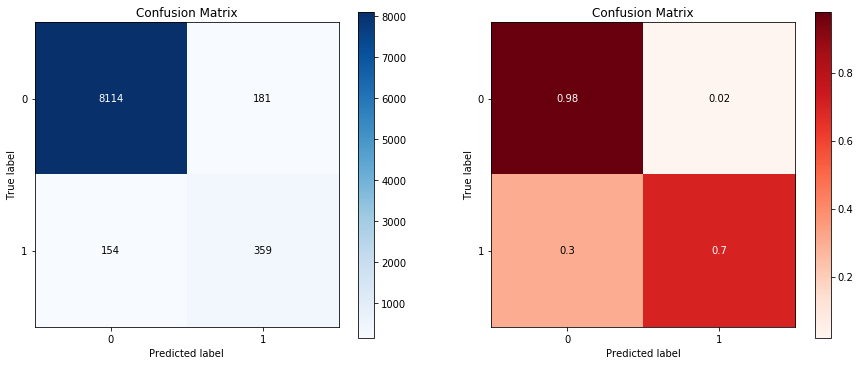

In [47]:
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Reds",
                                    ax=ax2);

In [48]:
y_gbc_proba = model2.predict_proba(x_test)

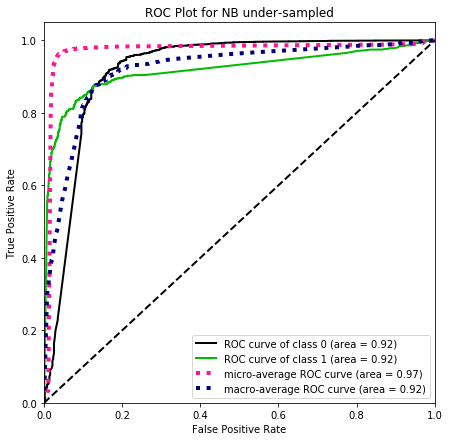

In [49]:
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_roc(y_test, y_gbc_proba, title = 'ROC Plot for NB under-sampled',ax=ax)

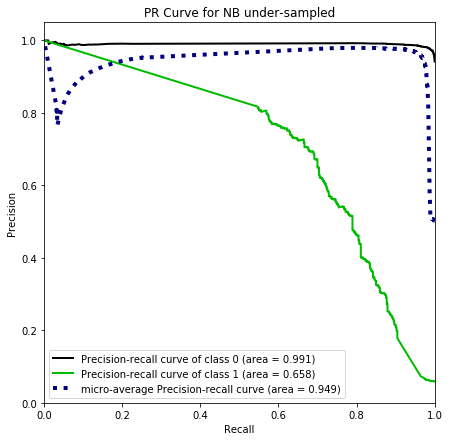

In [50]:
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_precision_recall(y_test, y_gbc_proba, title = 'PR Curve for NB under-sampled',ax=ax)

## As we saw , over-sampling data gave us better overall result's , I choosed naive_bayes as  our model as it gave us the best accuracy & F1-score 

## Saving the model for deployment

In [ ]:
import joblib
joblib.dump(model1,'model.h5')
joblib.dump(scaler1,'scaler.h5')